# Espectral Estimation 

### Miranda Viceconte

### a. What is an estimator? 

An estimator is a function or procedure that allows the evaluation of unknown parameters of a signal, such as frequency or amplitude, based on its observed samples. This is necessary because, in practice, signals are often affected by noise, measurement errors, or even by the digital quantization process itself, which introduces uncertainty when representing continuous values with a finite number of bits.

Analyzing estimators allows us to understand how accurate and reliable the methods we use are for recovering relevant parameters in real-world signals. In this particular case, we focus on two fundamental parameters:

The amplitude of a sinusoid, which represents its energy.

The frequency, which determines the periodicity of the signal.

These parameters are especially important in communication systems, spectral analysis, and biomedical signal processing, where a noisy signal can obscure relevant information that can only be recovered using robust estimators.

A typical signal has the following form:

$$ x(n)= a_n* sin(\Omega_1*n) + n_a(n) $$

Where the parameters are: 
* $ a_1$: amplitude of the sinusoid 
* $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N} $: angular frecuency 
* $\Omega_0 = \frac{\pi}{2} $: central frecuency
* $ f_r \sim \mathcal{U} \left( -\frac{1}{2}, \frac{1}{2} \right) $: random variation
* $ n_a(n) \sim \mathcal{N}(0, \sigma^2) $: white noise

The term $ f_r $ introduces a small random variation in the frequency of each realization of the signal. This simulates uncertainty in the exact frequency. At the same time, the white noise $ n_a(n) $ simulates typical disturbances in real systems, such as interference or thermal noise.

Why do we use estimators and what do they estimate?

In a pure sinusoidal signal, the two parameters that completely characterize it are its frequency and amplitude. In the presence of noise, these parameters become distorted, so it is necessary to estimate them in order to recover the original information.

Therefore, the following estimators are proposed:

- **Amplitud estimator**: 
$$ \hat{a}_1^{(i)} = \left| X_{iw}(\Omega_0) \right| = \left| \mathcal{F}\{x(n) \cdot w_i(n)\} \right| $$

- **Spectral estimator**
$$ \hat{\Omega}_1^{(i)} = \underset{\Omega}{\mathrm{arg\,max}} \left\{ \left| X_{iw}(\Omega) \right| \right\} $$

Where $w_i(n)$ is any window function. 


### b. Windowing and Spectral Leakage

When we apply a window to a signal in the time domain, we are performing a pointwise multiplication between the signal and the window. In the frequency domain, this operation translates into a convolution between the spectrum of the signal and the spectrum of the window.

This means that by limiting the signal in time, we are affecting its frequency representation: the signal’s energy is redistributed across the spectrum, which generates what is known as spectral leakage.

Spectral resolution is directly related to the width of the main lobe of the window’s Fourier transform:

* A wider window (in time) provides better frequency resolution, as its main lobe is narrower. However, this often results in higher side lobes, which cause more spectral leakage.

* A narrower window produces lower side lobes (less leakage), but a wider main lobe, leading to poorer frequency resolution.

In summary, there is a trade-off between spectral resolution and leakage: both cannot be optimized simultaneously. This phenomenon directly affects the precision of estimators, since energy from one frequency can "leak" into others, making it harder to accurately estimate parameters such as the signal’s frequency or amplitude.

Therefore, spectral resolution and leakage are closely tied to the shape of the window applied. Choosing the right window is crucial for obtaining accurate estimates, as it can reduce leakage while maintaining good frequency resolution.

This process of "shifting" the window and sampling according to spectral resolution aims to enhance our ability to identify key characteristics of the signal — such as its frequency and amplitude — despite noise or quantization limitations.

Different types of windows will be analyzed.


- **Rectangular**
The rectangular window is the simplest and is used when no windowing or "trimming" is applied to the signal. This window takes the signal as-is and does not modify it. It provides high frequency resolution, but induces significant spectral leakage.

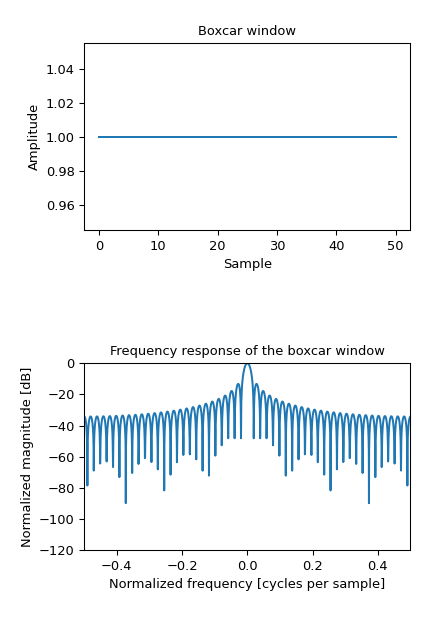

- **BartHannin**
The Bart-Hann window is a blend between the triangular and the Blackman-Harris windows. It is smooth at the edges and has a more gradual roll-off than the rectangular window, similar to the Blackman-Harris, but with a simpler shape. Spectral leakage is moderately reduced, and it provides medium spectral resolution.

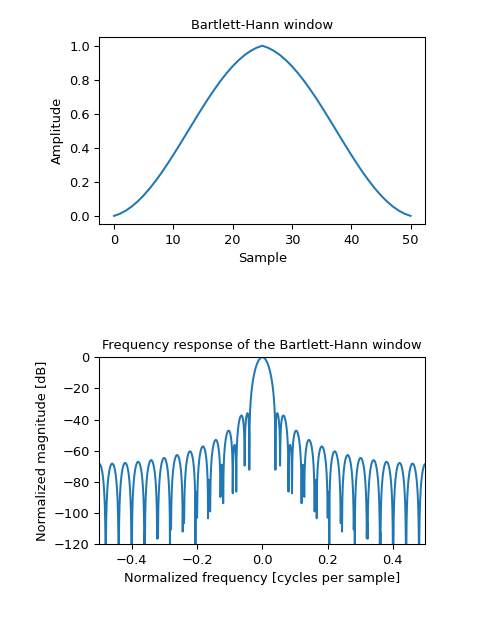 

- **Flattop**
The Flattop window is characterized by a shape that flattens the peak of the signal in the center, reducing the influence of the window's tails. It is specifically designed to minimize errors in amplitude estimation, since the "flat" shape helps reduce the effects of spectral leakage.

 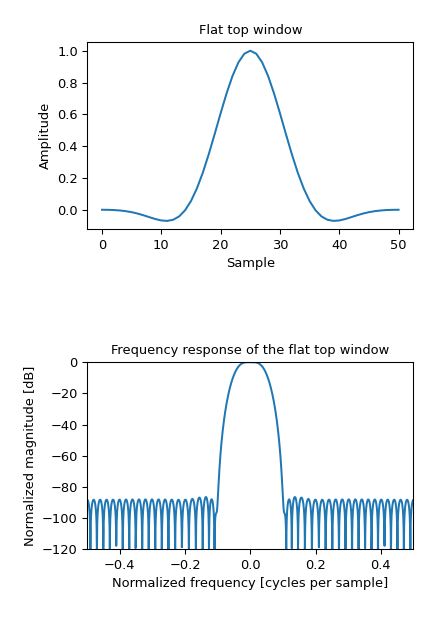 

- **Blackman-Harris**
The Blackman-Harris window has a smoother shape and is commonly used to reduce spectral leakage. Its shape is more complex than the rectangular window, with a more gradual roll-off toward the edges, which helps suppress side lobes in the frequency domain.

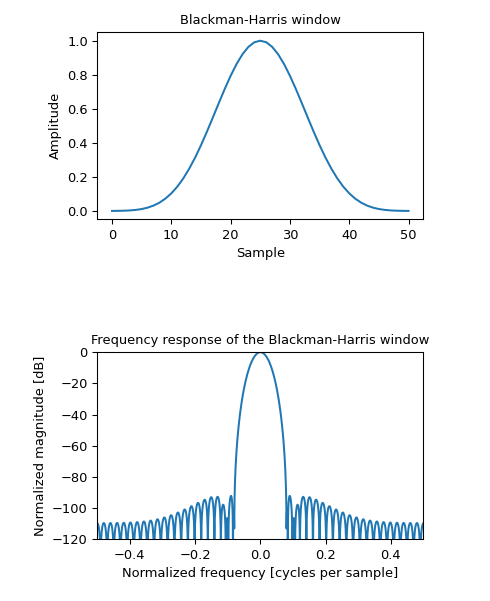 


### c. Probabilistic Analysis  

In signal processing—particularly in spectral estimation—probabilistic analysis plays a central role in evaluating the quality of estimators. Since many signals of interest can be modeled as realizations of random processes, spectral estimators must be analyzed not only in terms of their point estimates, but also regarding their statistical behavior.

Three fundamental concepts in this analysis are expectation (mean), bias, and variance of the estimator. The expectation gives the average value of the estimator over multiple realizations of the process. Based on the expectation, the bias is defined as the difference between the expected value of the estimator and the true value of the parameter being estimated. Variance, on the other hand, measures the spread of the estimator’s values around its expectation, reflecting its stability.

A good spectral estimator should have low bias (ideally be unbiased) and controlled variance, as both factors contribute to the mean squared error (MSE). Achieving this balance is essential for correctly interpreting the frequency content of both random and deterministic signals contaminated by noise.


### 2. Code & Simulation

The experiment aims to evaluate the bias and variance of an amplitude estimator for noisy sinusoidal signals, using different types of windows and two SNR levels (3 dB and 10 dB). A total of 200 realizations will be performed, each with 1000 samples, and the rectangular, flattop, and Blackman-Harris windows will be analyzed. The code will compute the average bias and variance of each estimator for each window and SNR level.

In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [2]:
#%% Definition of funtions 

def estimador_omega(f_t, N, df):
    FT_abs = np.abs(f_t[:N//2, :])
    omega_est = np.argmax(FT_abs, axis=0) * df
    return omega_est

In [3]:
#%% Simulation data and constant definitions

Np = 1000 
SNRs = [3, 10]  # Signal-to-Noise Ratio levels (dB)
R = 200         # Number of realizations
a1 = np.sqrt(2) # Signal amplitude. This choice normalizes the signal, no need to divide by the standard deviation
fs = 1000       # Sampling frequency (Hz) — convenient to use an integer value
N = 1000        # Number of samples per realization
N2 = 10 * N     # Zero-padding length for finer spectral resolution
ts = 1 / fs     # Sampling time
df = fs / N     # Spectral resolution (basic)
df_pp = fs / N2 # Spectral resolution with zero-padding
omega0 = fs / 4 # Central frequency (Hz)


In [4]:
#%% Signal X generation

# Define S

# Temporal sampling grid ---> TIME DISCRETIZATION (sampling)
tt = np.linspace(0, (N-1)*ts, N).reshape((1000, 1))  #[1000x1]
tt = np.tile(tt, (1, R))  # Repeater [1000x200]

# Frequency sampling grid
ff = np.linspace(0, (N-1)*df, N)  # .reshape(1, 1000) # [1,1000]
fr = np.random.uniform(-1/2, 1/2, size=(1, R))  # [1, 200]

omega1 = omega0 + fr * (df)

S = a1 * np.sin(2 * np.pi * omega1 * tt)

# Define the Barthann window
M = N
w = signal.windows.barthann(M).reshape((Np, 1))  # [1000, 1]

# Define the Blackman-Harris window
w2 = signal.windows.blackmanharris(M).reshape((Np, 1))  # [1000, 1]

# Define the Flattop window
w3 = signal.windows.flattop(M).reshape((Np, 1))  # [1000, 1]

# Frequency grid
freqs = np.fft.fftfreq(N, d=ts)


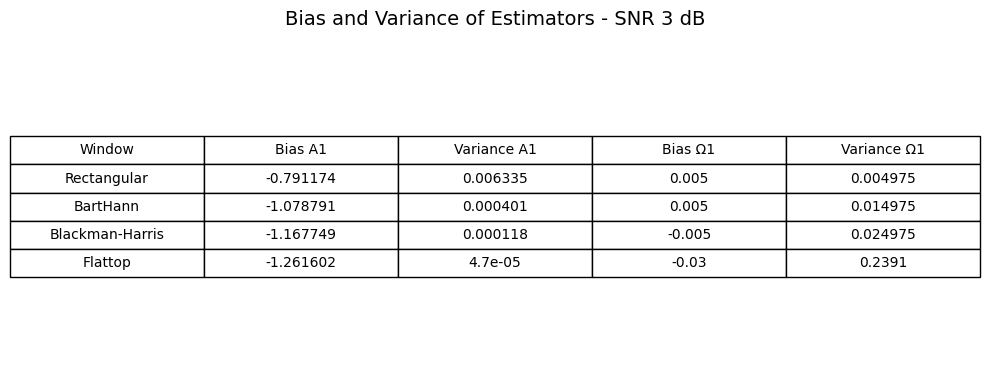

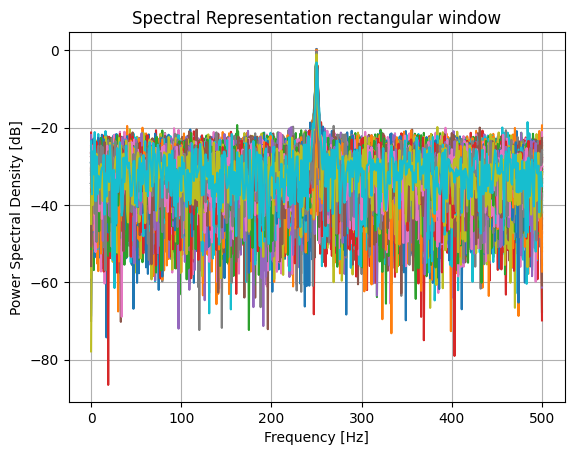

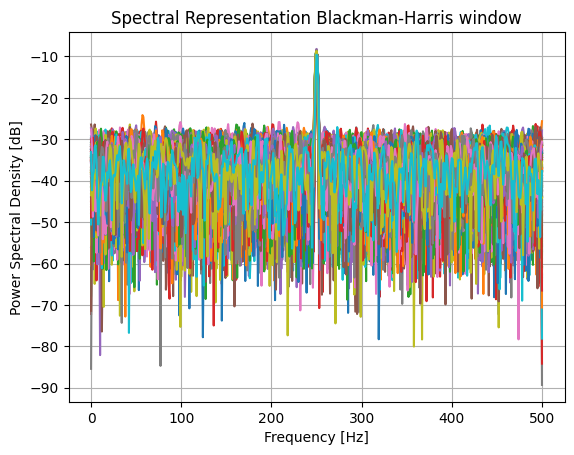

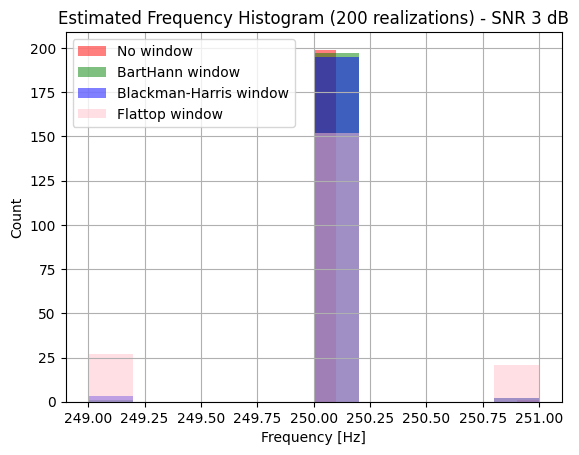

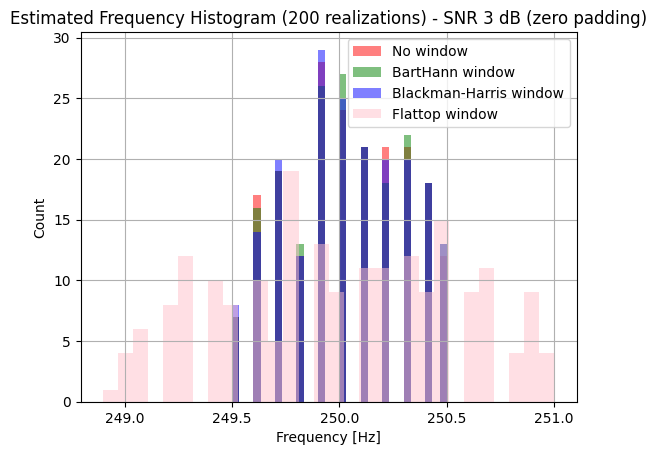

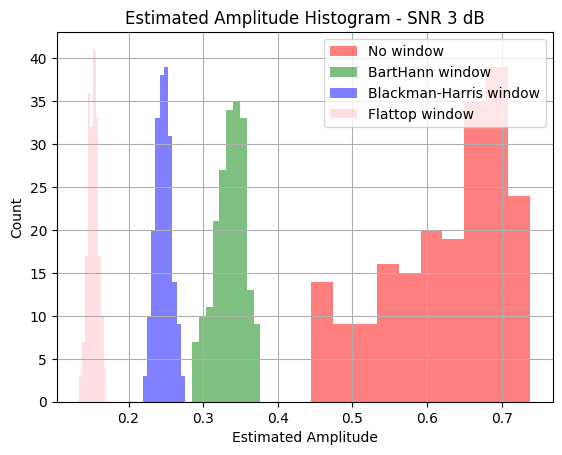

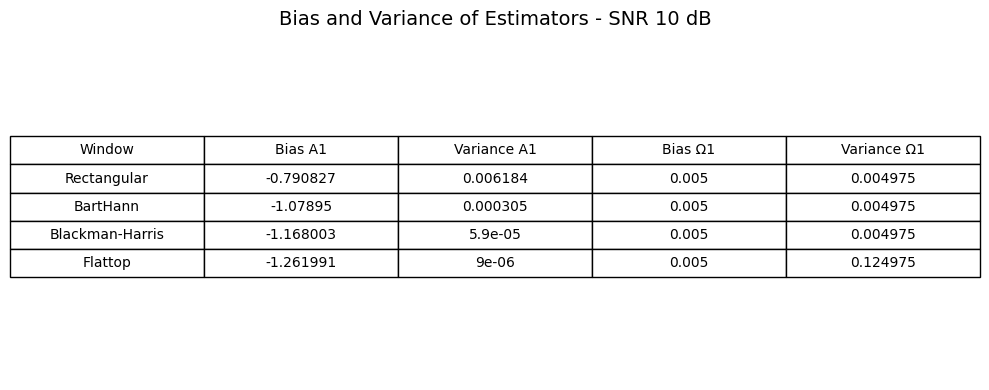

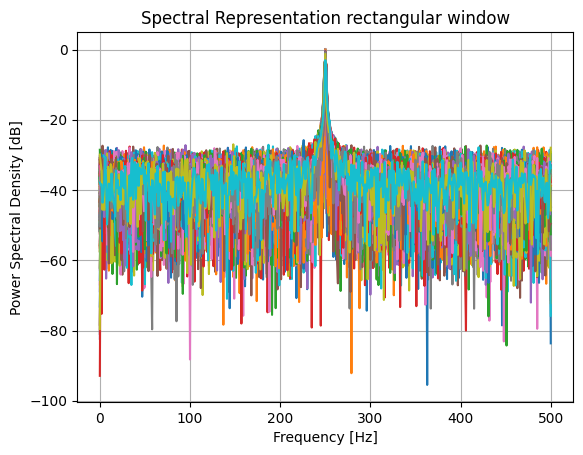

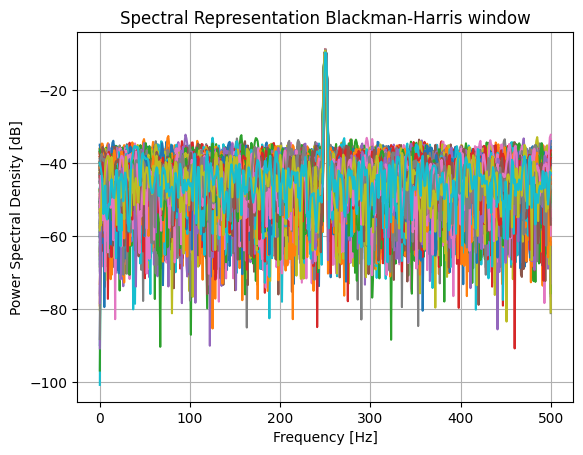

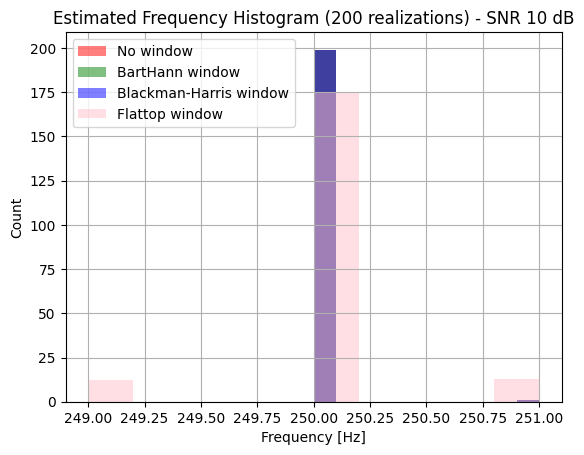

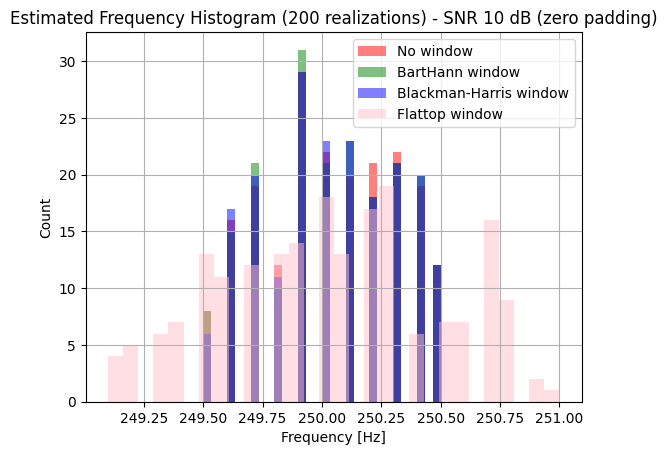

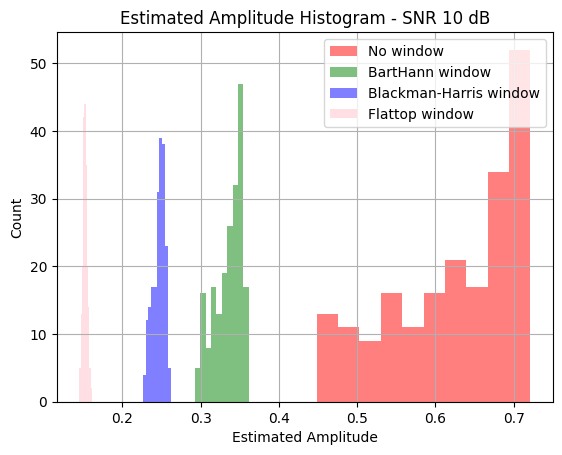

In [9]:
for snr_db in SNRs:
    #%% Noise data
    
    # Analog signal power --> derived from SNR
    pot_ruido_analog = 10**(- snr_db / 10)
    sigma = np.sqrt(pot_ruido_analog)
    
    # Generate analog noise
    nn = np.random.normal(0, sigma, (Np, R)) 
    
    # Final signal (signal + noise)
    xx = S + nn  # [1000x200]
    
    # Windowing
    xw = xx * w      # [1000, 200] * [1000, 1] → [1000, 200]
    xw2 = xx * w2
    xw3 = xx * w3
    
    # Fourier Transform (without zero padding)
    ft_xx = 1/N * np.fft.fft(xx,  axis=0) 
    ft_xw = 1/N * np.fft.fft(xw, axis=0) 
    ft_xw2 = 1/N * np.fft.fft(xw2, axis=0)
    ft_xw3 = 1/N * np.fft.fft(xw3, axis=0) 
    
    # Fourier Transform (with zero padding)
    ft_xx_pp = 1/N * np.fft.fft(xx, n=N2, axis=0) 
    ft_xw_pp = 1/N * np.fft.fft(xw, n=N2, axis=0) 
    ft_xw2_pp = 1/N * np.fft.fft(xw2, n=N2, axis=0)
    ft_xw3_pp = 1/N * np.fft.fft(xw3, n=N2, axis=0)
    
    # Amplitude estimator (a1 = |ft_xw| evaluated at N/4)
    
    # Non-windowed estimator
    a1_est = np.abs(ft_xx[N//4, :])  
    
    # Barthann window estimator
    a1_est2 = np.abs(ft_xw[N//4, :])  
    
    # Blackman-Harris window estimator
    a1_est3 = np.abs(ft_xw2[N//4, :])  
    
    # Flattop window estimator
    a1_est4 = np.abs(ft_xw3[N//4, :])  
    
    # Frequency estimator WITHOUT zero padding
    omega1_est = estimador_omega(ft_xx, N, df)
    omega2_est = estimador_omega(ft_xw, N, df)
    omega3_est = estimador_omega(ft_xw2, N, df)
    omega4_est = estimador_omega(ft_xw3, N, df)

    # BONUS: Frequency estimator WITH zero padding
    omega1_est_pp = estimador_omega(ft_xx_pp, N2, df_pp)
    omega2_est_pp = estimador_omega(ft_xw_pp, N2, df_pp)
    omega3_est_pp = estimador_omega(ft_xw2_pp, N2, df_pp)
    omega4_est_pp = estimador_omega(ft_xw3_pp, N2, df_pp)
    
    # Bias and variance of amplitude estimators
    true_value = a1
    mean_a1_xx  = np.mean(a1_est)
    mean_a1_xw  = np.mean(a1_est2)
    mean_a1_xw2 = np.mean(a1_est3)
    mean_a1_xw3 = np.mean(a1_est4)
    
    bias_a1_xx  = mean_a1_xx  - true_value
    bias_a1_xw  = mean_a1_xw  - true_value
    bias_a1_xw2 = mean_a1_xw2 - true_value
    bias_a1_xw3 = mean_a1_xw3 - true_value
    
    var_a1_xx  = np.var(a1_est)
    var_a1_xw  = np.var(a1_est2)
    var_a1_xw2 = np.var(a1_est3)
    var_a1_xw3 = np.var(a1_est4)
    
    # Bias and variance of frequency estimators
    true_freq = omega0

    mean_o_xx  = np.mean(omega1_est)
    mean_o_xw  = np.mean(omega2_est)
    mean_o_xw2 = np.mean(omega3_est)
    mean_o_xw3 = np.mean(omega4_est)
    
    bias_o_xx  = mean_o_xx  - true_freq
    bias_o_xw  = mean_o_xw  - true_freq
    bias_o_xw2 = mean_o_xw2 - true_freq
    bias_o_xw3 = mean_o_xw3 - true_freq
    
    var_o_xx  = np.var(omega1_est)
    var_o_xw  = np.var(omega2_est)
    var_o_xw2 = np.var(omega3_est)
    var_o_xw3 = np.var(omega4_est)
    
    window_names = ['Rectangular', 'BartHann', 'Blackman-Harris', 'Flattop']
    bias_amp = [bias_a1_xx, bias_a1_xw, bias_a1_xw2, bias_a1_xw3]
    var_amp = [var_a1_xx, var_a1_xw, var_a1_xw2, var_a1_xw3]
    bias_freq = [bias_o_xx, bias_o_xw, bias_o_xw2, bias_o_xw3]
    var_freq = [var_o_xx, var_o_xw, var_o_xw2, var_o_xw3]
    
    # Build data table as list of rows
    data_table = []
    for i in range(len(window_names)):
        row = [
            window_names[i],
            round(bias_amp[i], 6),
            round(var_amp[i], 6),
            round(bias_freq[i], 6),
            round(var_freq[i], 6)
        ]
        data_table.append(row)
    
    # Show table as image
    fig, ax = plt.subplots(figsize=(10, 2 + len(data_table)*0.5))
    ax.axis('off')
    table = ax.table(
        cellText=data_table,
        colLabels=['Window', 'Bias A1', 'Variance A1', 'Bias Ω1', 'Variance Ω1'],
        loc='center',
        cellLoc='center',
        colLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    plt.title('Bias and Variance of Estimators - SNR {} dB'.format(snr_db), fontsize=14)
    plt.tight_layout()
    plt.show()

    ### SPECTRAL REPRESENTATION ###
    plt.figure()
    bfrec = ff <= fs / 2
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_xx[bfrec])**2))
    plt.title('Spectral Representation rectangular window')
    plt.ylabel('Power Spectral Density [dB]')
    plt.xlabel('Frequency [Hz]')
    plt.grid(True)

    plt.figure()
    bfrec = ff <= fs / 2
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_xw2[bfrec])**2))
    plt.title('Spectral Representation Blackman-Harris window')
    plt.ylabel('Power Spectral Density [dB]')
    plt.xlabel('Frequency [Hz]')
    plt.grid(True)
    
    ### HISTOGRAMS ###
    # Frequency estimator histograms (no zero padding)
    plt.figure()
    plt.hist(omega1_est, bins=10, color='red', alpha=0.5, label="No window")
    plt.hist(omega2_est, bins=10, color='green', alpha=0.5, label="BartHann window")
    plt.hist(omega3_est, bins=10, color='blue', alpha=0.5, label="Blackman-Harris window")
    plt.hist(omega4_est, bins=10, color='pink', alpha=0.5, label="Flattop window")
    plt.title("Estimated Frequency Histogram (200 realizations) - SNR {} dB".format(snr_db))
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Count")
    plt.grid(True)
    plt.legend()

    # Frequency estimator histograms (with zero padding)
    plt.figure()
    plt.hist(omega1_est_pp, bins=30, color='red', alpha=0.5, label="No window")
    plt.hist(omega2_est_pp, bins=30, color='green', alpha=0.5, label="BartHann window")
    plt.hist(omega3_est_pp, bins=30, color='blue', alpha=0.5, label="Blackman-Harris window")
    plt.hist(omega4_est_pp, bins=30, color='pink', alpha=0.5, label="Flattop window")
    plt.title("Estimated Frequency Histogram (200 realizations) - SNR {} dB (zero padding)".format(snr_db))
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Count")
    plt.grid(True)
    plt.legend()
    
    # Amplitude estimator histograms
    plt.figure()
    plt.hist(a1_est, bins=10, color='red', alpha=0.5, label="No window")  # Bins: histogram spectral resolution; count vs value spread
    plt.hist(a1_est2, bins=10, color='green', alpha=0.5, label="BartHann window")
    plt.hist(a1_est3, bins=10, color='blue', alpha=0.5, label="Blackman-Harris window")
    plt.hist(a1_est4, bins=10, color='pink', alpha=0.5, label="Flattop window")
    plt.legend()

    plt.title("Estimated Amplitude Histogram - SNR {} dB".format(snr_db))
    plt.xlabel("Estimated Amplitude")
    plt.ylabel("Count")
    plt.grid(True)

plt.show()



### 3. Results Analysis 

Analyzing the obtained results, various conclusions can be drawn regarding the behavior of the estimators used.

Firstly, it is observed that for each SNR (signal-to-noise ratio) value, different results are obtained. This has several causes. On one hand, when working with random variables — that is, functions generated randomly in each experiment — it is not guaranteed that the realizations will be exactly the same in each run. Even between different SNR levels, it is likely that different random distributions will be used, as they are regenerated in each iteration of the for loop.

On the other hand, we know that the higher the SNR, the less influence the noise has. This is because the SNR represents how dominant the signal is compared to the noise. Therefore, a higher value indicates a better approximation to the original signal.

This is not always visually reflected in the graphs but can be observed in the histograms of the amplitude estimator, where the ranges narrow as the SNR increases. This implies that the realizations are less scattered, suggesting lower variance. Upon consulting the tables, this trend is confirmed, although the differences are not drastic. The same occurs with bias, which is harder to visualize graphically but is evident in the values in the table.

1. Amplitude Estimator

From the results, it is observed that the bias of all amplitude estimators is negative. This means that the estimated values tend to underestimate the real amplitude, due to the windows attenuating the original signal. That is, by applying a window, the shape of the signal is modified (truncated), i.e., it is attenuated, and the estimated value will be lower than the real one.

In general, the smoother the window, the more energy it attenuates. Therefore, the Flattop window, which is very smooth, shows the greatest negative bias, while the rectangular window, which attenuates almost nothing, shows the least bias.

Although it is often said that the Flattop window is the best for estimating amplitude, in this experiment the opposite has been observed. This discrepancy could be due to several factors. First, considering that the signal shows significant frequency variations, the Flattop window, primarily designed to reduce spectral leakage and provide accurate amplitude estimates in ideal situations, might not be the most suitable here. This is because its design may not optimally handle fluctuations in frequency.

Moreover, it is important to consider that the noise added to the signal, with an SNR of 3 and 10, could be excessive relative to the signal, affecting the Flattop window’s ability to correctly estimate the amplitude. In high-noise situations, other windows, such as Blackman-Harris, might offer better performance due to their greater suppression of side lobes and better handling of energy in the spectrum. Thus, the observed discrepancies may result from a combination of factors, including frequency variations in the signal and the SNR with the noise present.

However, the opposite occurs in terms of variance: smoother windows tend to concentrate the energy in a wider central lobe, with attenuated side lobes, which improves the stability of the estimator. This reduces the dispersion of estimates between realizations. This is consistent with what was observed, as the variances are low for all windows, indicating that the estimator is stable and consistent across realizations.

2. Frequency Estimator

Regarding the frequency estimator, it is observed that the Flattop window has the highest bias and variance. This is because its main lobe is very wide, blurring the spectral peak and making it difficult to identify the actual frequency. This is clearly reflected in the histograms, where many realizations with Flattop deviate more from the true value.

Consequently, the Flattop window is the worst for frequency estimation. In contrast, the Blackman-Harris window shows an excellent trade-off between side lobe suppression and main lobe width, resulting in low bias and low variance, making it the most suitable for frequency estimation in the presence of noise.

Conclusion:
To estimate frequency in the presence of noise, it is most advantageous to use windows that achieve a good balance between main lobe width and side lobe suppression, such as the Blackman-Harris window.

For amplitude estimation, the best option is often not to apply a window (which is equivalent to using a rectangular window), as it allows the full energy of the signal to be preserved without attenuation.

Another aspect we initially evaluated was whether each window function was working properly. In this part, we focus on the behavior of two specific windows and how they alter the shape of the signal. However, it’s important to note that during the full procedure, we tested and verified all window functions beforehand.

As we can observe, the first noticeable difference between the windows is the amount of amplitude or energy they concentrate. For instance, the rectangular window has sharp peaks that reach zero, whereas the Blackman-Harris window stays between -10 dB and 0 dB. This supports our initial hypothesis: except for the rectangular window, all other windows introduce a type of attenuation, effectively reducing the signal's energy. They behave like inverse amplifiers, diminishing the overall energy.

This is also why the bias becomes significantly larger depending on the window's characteristics.

### BONUS

### 1. Zero padding 

What is zero padding?
Zero padding consists of adding zeros to the end of the signal before applying the Fourier transform (FFT). This doesn’t add any real information, but it does increase the frequency resolution of the spectrum, allowing us to observe the frequency content in more detail.

What padding does, in practice, is similar to interpolating the spectrum: by having more points on the frequency axis, the “gaps” between the original frequencies are filled with smoother intermediate values. In other words, the frequency peak is no longer trapped between two bins, but has a better chance of falling closer to its actual value. In conclusion, we can estimate the frequency more accurately.

When using different windows (such as Hamming, Blackman, FlatTop, etc.), and especially with zero padding, you can observe that the histogram of frequency estimates becomes more spread out, particularly with windows like FlatTop. This occurs due to a phenomenon called leakage.

Leakage happens when the real frequency of the signal is not an exact multiple of the spectral resolution. That is, it doesn’t fall exactly on a bin of the original FFT. In those cases, the energy gets spread across several neighboring bins. By applying padding, we can see this spreading more clearly, which was always there but wasn’t visible with lower resolution.

Before padding, the frequency estimator had only a few possible places to “land,” so the estimates were more concentrated: it forced a choice between the available bins, even though the real frequency might have been between two. With padding, there are more bins, so there are more chances for the estimator to land closer to the actual frequency.

As a result, we get a wider histogram, but one that is more representative of the true spectral behavior.

With padding, both the bias and variance of the frequency estimates tend to decrease. This is because the estimator now has more possible points to hit, improving its accuracy. In some cases, like yours, they may even become practically zero, indicating a very precise estimate with no systematic deviations.

The FlatTop window is designed to have a very flat frequency response at the peak, making it excellent for accurately measuring the amplitude of frequencies (as long as the gain is corrected). But this design comes with a consequence: its bandwidth is larger and its main lobe is wider, which increases leakage. Therefore, when using this window, it’s expected to see more spreading in the spectrum and in the histogram of frequency estimates.
 

### 2. Alternative estimators 

In [6]:
def estimator_omega2(f_t, N, df):
    FT_abs = np.abs(f_t[:N//2, :])
    P_est = (1/N) * (FT_abs ** 2)
    omega_est = np.argmax(P_est, axis=0) * df
    return omega_est

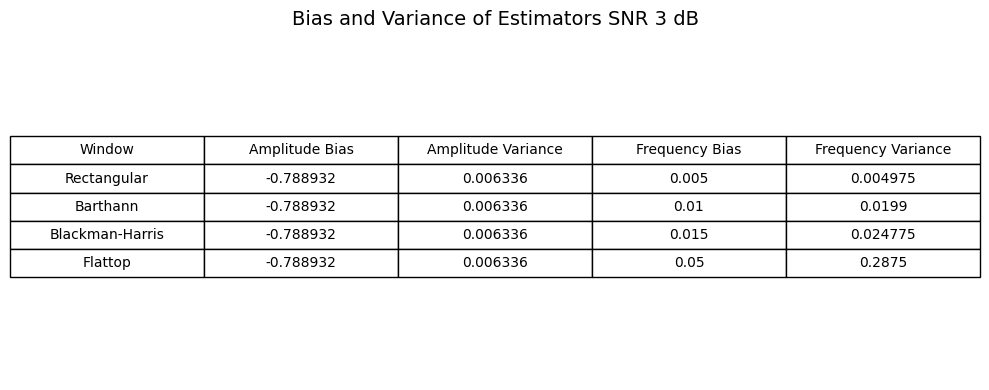

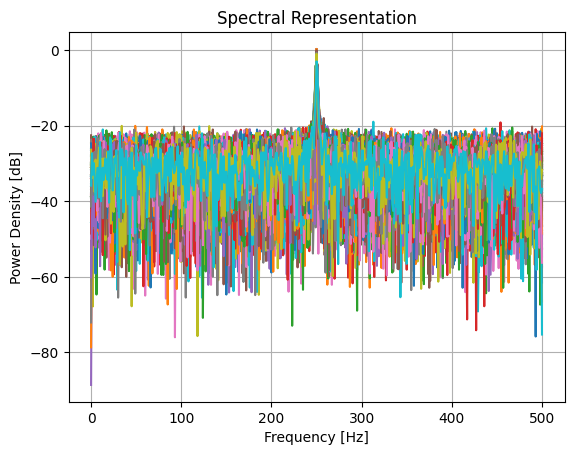

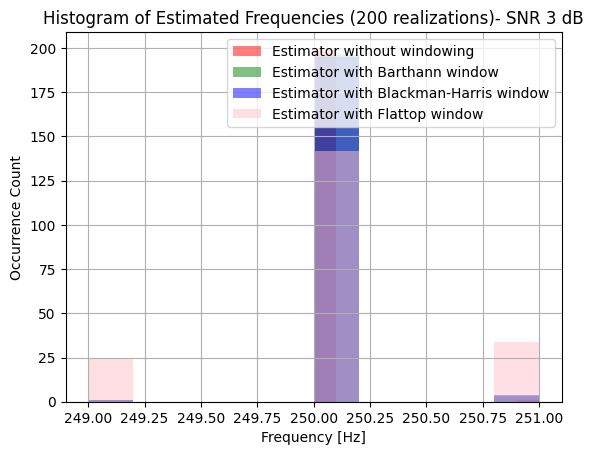

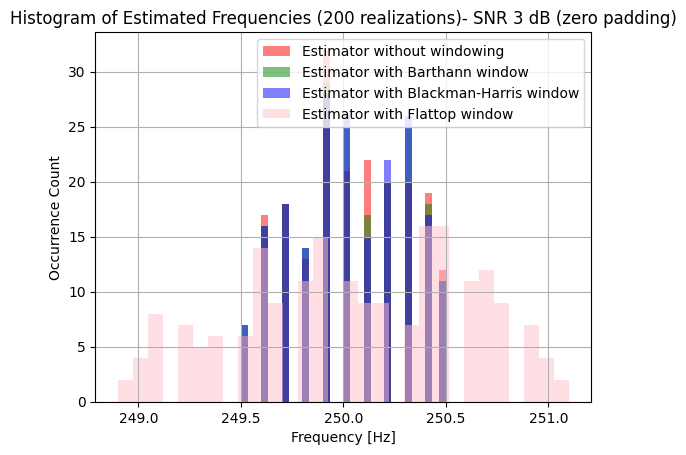

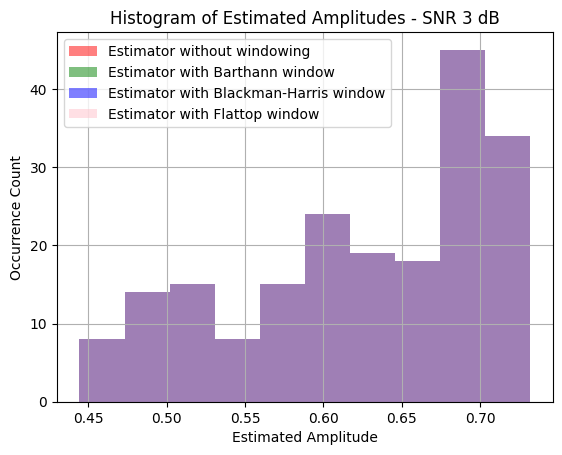

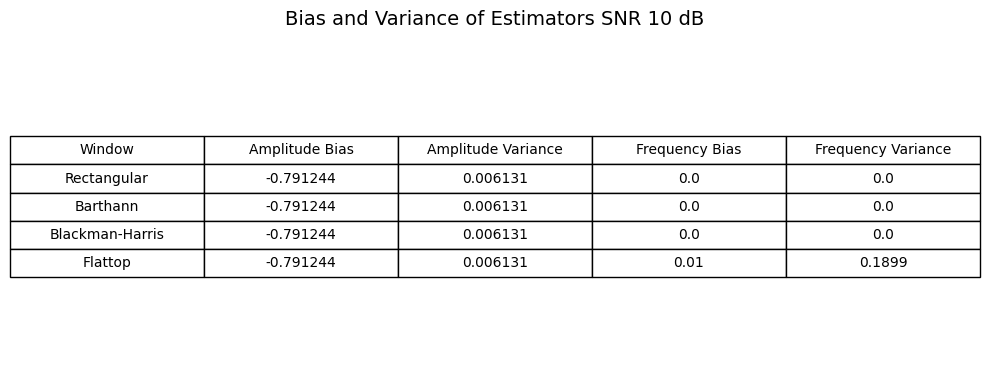

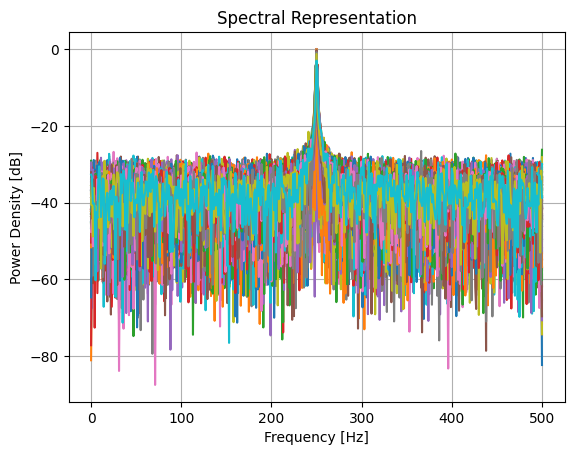

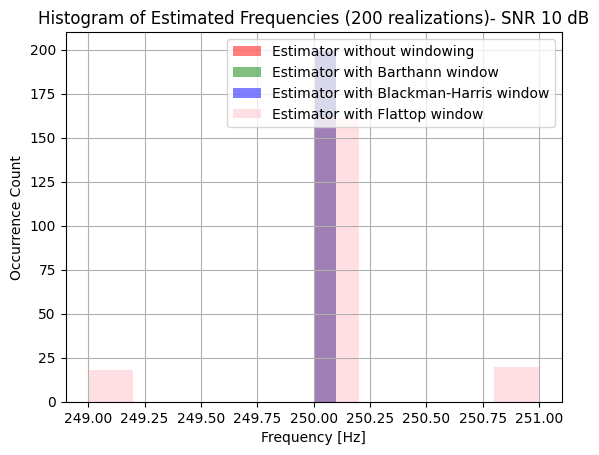

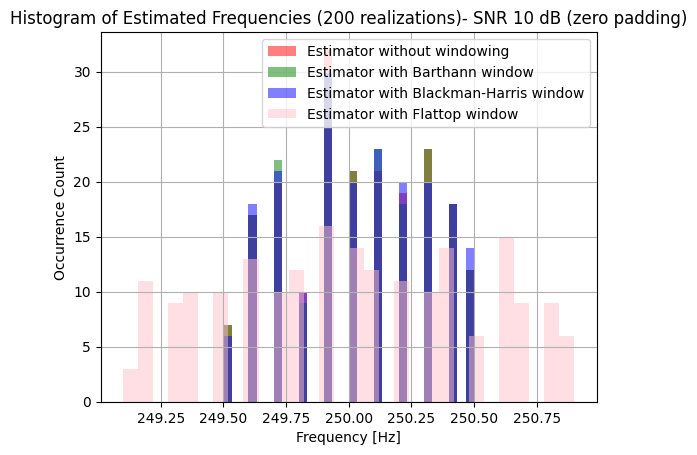

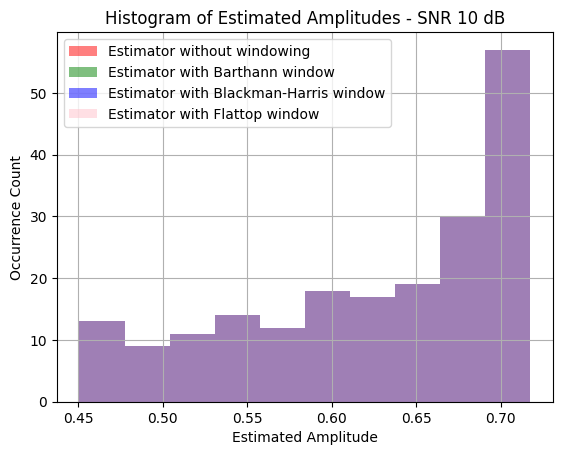

In [7]:
for snr_db in SNRs:
    # #%% Noise Data
    
    # # Analog signal --> Derived from SNR
    noise_power_analog = 10**(- snr_db / 10)
    sigma = np.sqrt(noise_power_analog)
    # #Generate analog noise
    nn = np.random.normal(0, sigma, (Np, R)) 
    
    # Final Signal
    xx = S + nn  # [1000x200]
    
    # Multiplication
    xw = xx * w  # [1000, 200] * [1000, 1] → [1000, 200]
    xw2 = xx * w2 
    xw3 = xx * w3
    
    # Transformation and Estimators 

    # Calculate the transform without zero padding
    ft_xx = 1 / N * np.fft.fft(xx, axis=0) 
    ft_xw = 1 / N * np.fft.fft(xw, axis=0) 
    ft_xw2 = 1 / N * np.fft.fft(xw2, axis=0)
    ft_xw3 = 1 / N * np.fft.fft(xw3, axis=0) 
    
    # Calculate the transform with zero padding
    ft_xx_pp = 1 / N * np.fft.fft(xx, n=N2, axis=0) 
    ft_xw_pp = 1 / N * np.fft.fft(xw, n=N2, axis=0) 
    ft_xw2_pp = 1 / N * np.fft.fft(xw2, n=N2, axis=0)
    ft_xw3_pp = 1 / N * np.fft.fft(xw3, n=N2, axis=0)
    
    # Calculate the amplitude estimator (a1=mod(ft_xw))

    # Estimator
    # # Estimator without windowing
    a1_est = np.abs(ft_xx)  # [1000, 200] // Integer division
    a1_est_max = np.max(a1_est, axis=0) 
    
    # # Estimator with Barthann window
    a1_est2 = np.abs(ft_xx)  # [1000, 200] // Integer division
    a1_est_max2 = np.max(a1_est2, axis=0) 
    
    # # Estimator with Blackman-Harris window
    a1_est3 = np.abs(ft_xx)  # [1000, 200] // Integer division
    a1_est_max3 = np.max(a1_est3, axis=0) 
    
    # # Estimator with Flattop window
    a1_est4 = np.abs(ft_xx)  # [1000, 200] // Integer division
    a1_est_max4 = np.max(a1_est4, axis=0) 
    
    # WITHOUT ZERO PADDING
    omega1_est = estimator_omega2(ft_xx, N, df)
    omega2_est = estimator_omega2(ft_xw, N, df)
    omega3_est = estimator_omega2(ft_xw2, N, df)
    omega4_est = estimator_omega2(ft_xw3, N, df)

    # BONUS - WITH ZERO PADDING 
    omega1_est_pp = estimator_omega2(ft_xx_pp, N2, df_pp)
    omega2_est_pp = estimator_omega2(ft_xw_pp, N2, df_pp)
    omega3_est_pp = estimator_omega2(ft_xw2_pp, N2, df_pp)
    omega4_est_pp = estimator_omega2(ft_xw3_pp, N2, df_pp)
    
    # Calculate the bias and variance of the amplitude estimator
    real_value = a1
    expectation_a1_xx = np.mean(a1_est_max)
    expectation_a1_xw = np.mean(a1_est_max2)
    expectation_a1_xw2 = np.mean(a1_est_max3)
    expectation_a1_xw3 = np.mean(a1_est_max4)
    
    bias_a1_xx = expectation_a1_xx - real_value
    bias_a1_xw = expectation_a1_xw - real_value
    bias_a1_xw2 = expectation_a1_xw2 - real_value
    bias_a1_xw3 = expectation_a1_xw3 - real_value
    
    variance_a1_xx = np.var(a1_est_max)
    variance_a1_xw = np.var(a1_est_max2)
    variance_a1_xw2 = np.var(a1_est_max3)
    variance_a1_xw3 = np.var(a1_est_max4)
    
    # Calculate the bias and variance of the spectral frequency estimator
    real_value2 = omega0 

    expectation_o_xx = np.mean(omega1_est)
    expectation_o_xw = np.mean(omega2_est)
    expectation_o_xw2 = np.mean(omega3_est)
    expectation_o_xw3 = np.mean(omega4_est)
    
    bias_xx_o = expectation_o_xx - real_value2
    bias_xw_o = expectation_o_xw - real_value2
    bias_xw2_o = expectation_o_xw2 - real_value2
    bias_xw3_o = expectation_o_xw3 - real_value2
    
    variance_xx_o = np.var(omega1_est)
    variance_xw_o = np.var(omega2_est)
    variance_xw2_o = np.var(omega3_est)
    variance_xw3_o = np.var(omega4_est)
    

    window_names = ['Rectangular', 'Barthann', 'Blackman-Harris', 'Flattop']
    amplitude_biases = [bias_a1_xx, bias_a1_xw, bias_a1_xw2, bias_a1_xw3]
    amplitude_variances = [variance_a1_xx, variance_a1_xw, variance_a1_xw2, variance_a1_xw3]
    frequency_biases = [bias_xx_o, bias_xw_o, bias_xw2_o, bias_xw3_o]
    frequency_variances = [variance_xx_o, variance_xw_o, variance_xw2_o, variance_xw3_o]
    
    # Create data as a list of rows
    data_table = []
    for i in range(len(window_names)):
        row = [
            window_names[i],
            round(amplitude_biases[i], 6),
            round(amplitude_variances[i], 6),
            round(frequency_biases[i], 6),
            round(frequency_variances[i], 6)
        ]
        data_table.append(row)
    
    # Display table as an image
    fig, ax = plt.subplots(figsize=(10, 2 + len(data_table) * 0.5))
    ax.axis('off')
    table = ax.table(
        cellText=data_table,
        colLabels=['Window', 'Amplitude Bias', 'Amplitude Variance', 'Frequency Bias', 'Frequency Variance'],
        loc='center',
        cellLoc='center',
        colLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    plt.title('Bias and Variance of Estimators SNR {} dB'.format(snr_db), fontsize=14)
    plt.tight_layout()
    plt.show()

    ### HISTOGRAM ###
    plt.figure()
    bfrec = ff <= fs / 2
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_xx[bfrec])**2))
    plt.title('Spectral Representation Rectangular Window')
    plt.ylabel('Power Density [dB]')
    plt.xlabel('Frequency [Hz]')
    plt.grid(True)
    
    plt.figure()
    plt.hist(omega1_est, bins=10, color='red', alpha=0.5, label="Estimator without windowing")
    plt.hist(omega2_est, bins=10, color='green', alpha=0.5, label="Estimator with Barthann window")
    plt.hist(omega3_est, bins=10, color='blue', alpha=0.5, label="Estimator with Blackman-Harris window")
    plt.hist(omega4_est, bins=10, color='pink', alpha=0.5, label="Estimator with Flattop window")
    plt.title("Histogram of Estimated Frequencies (200 realizations)- SNR {} dB".format(snr_db))
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Occurrence Count")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.hist(omega1_est_pp, bins=30, color='red', alpha=0.5, label="Estimator without windowing")
    plt.hist(omega2_est_pp, bins=30, color='green', alpha=0.5, label="Estimator with Barthann window")
    plt.hist(omega3_est_pp, bins=30, color='blue', alpha=0.5, label="Estimator with Blackman-Harris window")
    plt.hist(omega4_est_pp, bins=30, color='pink', alpha=0.5, label="Estimator with Flattop window")
    plt.title("Histogram of Estimated Frequencies (200 realizations)- SNR {} dB (zero padding)".format(snr_db))
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Occurrence Count")
    plt.grid(True)
    plt.legend()
    
    plt.figure()
    plt.hist(a1_est_max, bins=10, color='red', alpha=0.5, label="Estimator without windowing") # Bins: spectral resolution of the histogram; relative count. WIDTH of the values.
    plt.hist(a1_est_max2, bins=10, color='green', alpha=0.5, label="Estimator with Barthann window")
    plt.hist(a1_est_max3, bins=10, color='blue', alpha=0.5, label="Estimator with Blackman-Harris window")
    plt.hist(a1_est_max4, bins=10, color='pink', alpha=0.5, label="Estimator with Flattop window")
    plt.legend()

    plt.title("Histogram of Estimated Amplitudes - SNR {} dB".format(snr_db))
    plt.xlabel("Estimated Amplitude")
    plt.ylabel("Occurrence Count")
    plt.grid(True)
    
plt.show()


### Analysis

The most significant change we can observe is in the amplitude estimation. Initially, the amplitude was estimated by taking the value of the spectrum at a fixed bin  (N//4),assuming that the maximum spectrum frequency would be at that point, since it was considered that $  \Omega_0= π/2 $, which corresponds to a frequency of 250 Hz, exactly 1/4 of the number of samples. In this case, the frequency was obtained by identifying the index of the maximum value within the magnitude spectrum. However, in the second estimator, the amplitude was calculated as the maximum value of the entire spectrum for each signal, which results in a more accurate estimation. This is because this approach does not depend on a specific location in the spectrum; regardless of where the peak occurs, the estimator will always calculate it correctly, making it more robust to variations in the spectral shape of the signal.

The main difference between the two methods lies in how they handle the spectral spreading introduced by windows. In the first case, by taking a fixed bin, it is assumed that the signal energy always falls in the same position of the spectrum, which is not valid when leakage occurs or when windows smooth and widen the peaks. This leads to amplitude estimates with biases and variances that are highly dependent on the type of window used: some concentrate the energy better, while others spread it more, leading to significant differences between windows. In fact, we observed that in this case, the estimated amplitude values have very different ranges depending on the window, and their errors also vary.

On the other hand, by using the maximum value as the amplitude estimator, we ensure that we capture the most energetic point of the spectrum, regardless of where it is located. This allows the estimation to adapt to the spectral shape imposed by each window, making the results more consistent between windows. While this method does not explicitly compensate for the gain of each window (a process that would require applying a correction factor for each window), it serves as a way to mitigate this issue: by not depending on a fixed bin, it reduces the bias introduced by the main lobe and its side lobes. Thus, the errors in the amplitude estimation are smaller and more consistent across windows, making it easier to compare different spectral pointing methods.

Additionally, when comparing the frequency estimators, it is observed that both methods — the one that looks for the maximum in the magnitude spectrum $FT_{abs}$ and the one that does so over the spectral power $ P_{est} = \frac{1}{N} \cdot (FT_{abs}^2) $ yield practically the same results. This is because both are looking for the same peak in the spectrum, and the operation of squaring does not change the position of the maximum, only its scale. Therefore, the frequency estimates are very similar, regardless of whether spectral energy or magnitude is used. This coincidence is expected, as variations in the peak shape (caused by the window type) affect the lateral energy dispersion more than the location of the maximum, which tends to remain quite stable.